In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest # cdf

from statsmodels.stats.power import TTestIndPower
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples

# Simulation

In [2]:
def simulate_two_gaussians(n_samples, n_simulations=1000, mu1=0, mu2=1, s1=1, s2=1):
    samples_1 = [np.random.normal(loc=mu1, scale=s1, size=n_samples) for i in range(n_simulations )]
    means_1 = np.mean(samples_1, axis=1)
    
    samples_2 = [np.random.normal(loc=mu2, scale=s2, size=n_samples) for i in range(n_simulations)]
    means_2 = np.mean(samples_2, axis=1)
    
    plt.hist(means_1, bins=50, color="y")
    plt.hist(means_2, bins=50, color="b")

In [75]:
n_samples = 2
n_simulations = 1000
mu1 = 65
mu2 = 72
s1 = 4
s2 = 3

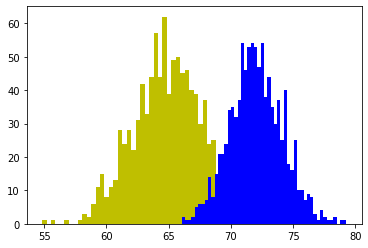

In [76]:
simulate_two_gaussians(n_samples=n_samples, n_simulations=n_simulations, mu1=mu1, mu2=mu2, s1=s1, s2=s2)

# Youtube case study

In [35]:
prev_yt_data = pd.read_csv("prev_data.csv")

In [66]:
prev_yt_data.shape

(20000, 4)

In [38]:
prev_yt_data.sample(20)

,date,customer_id,premium,watch_time_hrs
13524,2017-07-05,725,0,3.195276
14400,2017-10-29,171,0,2.023461
10003,2017-12-25,855,0,9.134083
10043,2017-01-12,693,0,5.987144
12799,2017-03-30,453,0,5.365239
3317,2017-07-08,194,0,1.270367
7386,2017-12-20,258,1,4.829032
13175,2017-10-16,723,1,4.844410
7092,2017-10-23,401,0,2.435973
11336,2017-06-11,530,0,3.518609


In [39]:
prev_yt_data.describe()

,customer_id,premium,watch_time_hrs
count,20000.000000,20000.000000,20000.000000
mean,496.860200,0.155450,8.121169
std,287.733041,0.362342,212.138482
min,0.000000,0.000000,0.192767
25%,250.000000,0.000000,1.769474
50%,496.000000,0.000000,2.854844
75%,742.250000,0.000000,4.551919
max,999.000000,1.000000,10008.561895


In [40]:
q998 = prev_yt_data["watch_time_hrs"].quantile(0.998)
q998

23.93426900607841

In [41]:
prev_yt_data_no_out = prev_yt_data[prev_yt_data["watch_time_hrs"]<q998]

In [42]:
mu_h0 = np.mean(prev_yt_data_no_out["watch_time_hrs"])
mu_h0

3.578971070350521

In [44]:
diff_mu = np.abs(mu_h0*0.1) # We are looking to detect if there is 10% change

In [46]:
# Effect size: Cohen'd (mu1 - mu2)/sigma
cohens_d_effect_size = diff_mu/np.std(prev_yt_data_no_out["watch_time_hrs"])
cohens_d_effect_size

0.13374109689019192

In [68]:
# Given effect, alpha, power --> compute the number of samples needed
# A/B testing: test on a bunch of users and compare with previous algorithm
# How many people at least should we test this on

TTestIndPower().solve_power(effect_size=cohens_d_effect_size, alpha=0.01, power=0.8)

1307.5440017558099

# Other tests

In [55]:
samples_normal = np.random.normal(loc=3, scale=2, size=200)

(array([ 6.,  8., 24., 36., 42., 33., 32., 11.,  5.,  3.]),
 array([-2.23537978e+00, -1.12075297e+00, -6.12615200e-03,  1.10850066e+00,
         2.22312748e+00,  3.33775429e+00,  4.45238111e+00,  5.56700792e+00,
         6.68163474e+00,  7.79626155e+00,  8.91088837e+00]),
 <BarContainer object of 10 artists>)

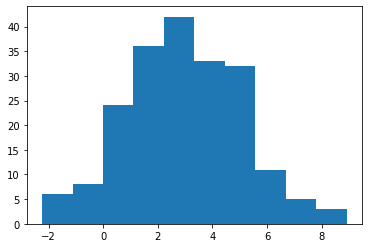

In [56]:
plt.hist(samples_normal)

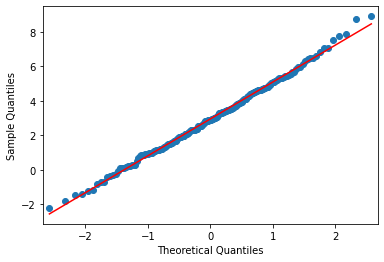

In [58]:
qqplot(samples_normal, line="r")
plt.show()

In [65]:
kstest(samples_normal, norm.cdf, args=(samples_normal.mean(), samples_normal.std()))

KstestResult(statistic=0.03131120111778518, pvalue=0.9861572348685119, statistic_location=2.3638150969512446, statistic_sign=1)

In [59]:
samples_exponential = np.random.exponential(size=200)

(array([79., 38., 29., 22., 11., 14.,  5.,  1.,  0.,  1.]),
 array([0.00776677, 0.46934444, 0.93092212, 1.39249979, 1.85407746,
        2.31565513, 2.77723281, 3.23881048, 3.70038815, 4.16196582,
        4.6235435 ]),
 <BarContainer object of 10 artists>)

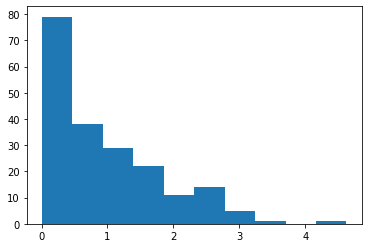

In [60]:
plt.hist(samples_exponential)

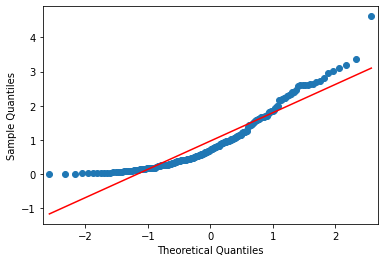

In [61]:
qqplot(samples_exponential, line="r")
plt.show()